In [76]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle
import sys

sys.path.append(r"/home/rachas/PycharmProjects/Udacity/ud120-projects-master/outliers/")

from outlier_cleaner import outlierCleaner

In [109]:
### load up some practice data with outliers in it
ages = pickle.load( open(r"/home/rachas/PycharmProjects/Udacity/ud120-projects-master/outliers/practice_outliers_ages.pkl", "rb") )
net_worths = pickle.load( open(r"/home/rachas/PycharmProjects/Udacity/ud120-projects-master/outliers/practice_outliers_net_worths.pkl", "rb") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

In [110]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(ages_train,net_worths_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    def getKey(item):
        return item[2]

    for i in range(0,90):
        cleaned_data.append([ages[i], net_worths[i], abs(net_worths[i]-predictions[i])])


    
    cleaned_data.sort(key=getKey)

    cleaned_data = cleaned_data[:81]

    return cleaned_data

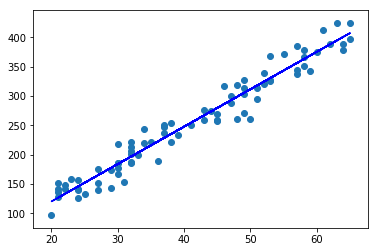

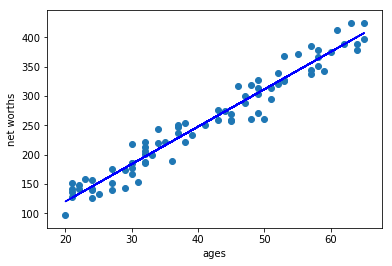

In [115]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner(predictions, ages_train, net_worths_train )
except NameError:
    print ("your regression object doesn't exist, or isn't name reg")
    print ("can't make predictions to use in identifying outliers")


### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print ("you don't seem to have regression imported/created,")
        print ("   or else your regression object isn't named reg")
        print ("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print ("outlierCleaner() is returning an empty list, no refitting to be done")

In [117]:
reg.coef_

array([[ 6.36859481]])

In [118]:
reg.score(ages_test,net_worths_test)

0.98318945539553204

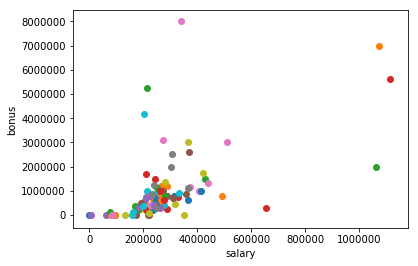

In [159]:
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open(r"/home/rachas/PycharmProjects/Udacity/ud120-projects-master/final_project/final_project_dataset.pkl", "rb") )
features = ["salary", "bonus"]

data_dict.pop("TOTAL",0)

data = featureFormat(data_dict, features)

max_salary = 0
max_bonus = 0

salary_old = 0
bonus_old = 0
### your code below
for point in data:
    
    salary_old = salary
    bonus_old=bonus
    
    salary = point[0]
    bonus = point[1]
    
    matplotlib.pyplot.scatter(salary,bonus)
    
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()
